In [151]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from pandas.plotting import scatter_matrix
from sklearn.linear_model import LogisticRegression
%matplotlib inline

In [152]:
df = pd.read_csv('train.csv')

In [153]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
PassengerId,891.0,446.000000,257.353842,1.00,223.5000,446.0000,668.5,891.0000
Survived,891.0,0.383838,0.486592,0.00,0.0000,0.0000,1.0,1.0000
Pclass,891.0,2.308642,0.836071,1.00,2.0000,3.0000,3.0,3.0000
Age,714.0,29.699118,14.526497,0.42,20.1250,28.0000,38.0,80.0000
SibSp,891.0,0.523008,1.102743,0.00,0.0000,0.0000,1.0,8.0000
Parch,891.0,0.381594,0.806057,0.00,0.0000,0.0000,0.0,6.0000
Fare,891.0,32.204208,49.693429,0.00,7.9104,14.4542,31.0,512.3292


In [154]:
df = df.drop(columns=['PassengerId','Name','Cabin','Ticket'])
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


In [155]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
Survived    891 non-null int64
Pclass      891 non-null int64
Sex         891 non-null object
Age         714 non-null float64
SibSp       891 non-null int64
Parch       891 non-null int64
Fare        891 non-null float64
Embarked    889 non-null object
dtypes: float64(2), int64(4), object(2)
memory usage: 55.8+ KB


In [156]:
df[df.Age.isna()]
age_median = df.Age.median()
df['Age'] = df.Age.fillna(age_median)
# also try using mean?

In [157]:
df[df.Embarked.isna()]
embarked_mode = df.Embarked.mode()
df['Embarked'] = df.Embarked.fillna(embarked_mode)
# also try dropping if embarked is important???

In [158]:
# df['Pclass'] = pd.to_string(df.Pclass, errors='coerce')
df['Pclass'] = df['Pclass'].astype(str)

In [159]:
# baseline is guess of non-survival
# or probability of survival based on whole pop, .38 = (342 / (342+549))

In [160]:
y = df.Survived
X = df.drop(columns=['Survived'])
X.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,male,22.0,1,0,7.2500,S
1,1,female,38.0,1,0,71.2833,C
2,3,female,26.0,0,0,7.9250,S
3,1,female,35.0,1,0,53.1000,S
4,3,male,35.0,0,0,8.0500,S


In [161]:
X =pd.get_dummies(X)
# prob drop PassengerID and will need to drop one and dummy Sex, Embarked, Pclass
X = X.drop(columns=['Sex_female','Embarked_C','Pclass_1'])
X = sm.add_constant(X)
X.head()

,const,Age,SibSp,Parch,Fare,Pclass_2,Pclass_3,Sex_male,Embarked_Q,Embarked_S
0,1.0,22.0,1,0,7.2500,0,1,1,0,1
1,1.0,38.0,1,0,71.2833,0,0,0,0,0
2,1.0,26.0,0,0,7.9250,0,1,0,0,1
3,1.0,35.0,1,0,53.1000,0,0,0,0,1
4,1.0,35.0,0,0,8.0500,0,1,1,0,1


0    549
1    342
Name: Survived, dtype: int64

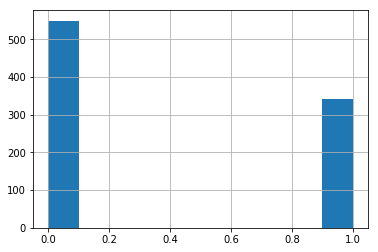

In [162]:
#df['Survived'].hist()
y.hist()
y.value_counts()

In [163]:
df.corr()['Survived'].sort_values()

Age        -0.064910
SibSp      -0.035322
Parch       0.081629
Fare        0.257307
Survived    1.000000
Name: Survived, dtype: float64

In [164]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [165]:
X_train.shape

(596, 10)

In [166]:
model = sm.OLS(y_train, X_train)
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               Survived   R-squared:                       0.374
Model:                            OLS   Adj. R-squared:                  0.364
Method:                 Least Squares   F-statistic:                     38.84
Date:                Fri, 20 Jul 2018   Prob (F-statistic):           3.69e-54
Time:                        18:54:37   Log-Likelihood:                -273.13
No. Observations:                 596   AIC:                             566.3
Df Residuals:                     586   BIC:                             610.2
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.0607      0.076     13.892      0.000       0.911       1.211
Age           -0.0040      0.001     -2.935      0.003      -0.007      -0.001
SibSp         -0.0337      0.015     -2.271      0.023      -0.063      -0.005
Parch         -0.0203      0.023     -0.872      0.384      -0.066       0.025
Fare           0.0006      0.000      1.615      0.107      -0.000       0.001
Pclass_2      -0.0339      0.056     -0.600      0.549      -0.145       0.077
Pclass_3      -0.2488      0.053     -4.714      0.000      -0.352      -0.145
Sex_male      -0.4913      0.035    -13.881      0.000      -0.561      -0.422
Embarked_Q    -0.0509      0.068     -0.743      0.458      -0.185       0.084
Embarked_S    -0.1261      0.044     -2.862      0.004      -0.213      -0.040
==============================================================================
Omnibus:                       32.662   Durbin-Watson:                   2.036
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               36.901
Skew:                           0.608   Prob(JB):                     9.71e-09
Kurtosis:                       3.081   Cond. No.                         378.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [167]:
model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [168]:
model.predict(X_test)

array([0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1,
       0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0,
       0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1,
       0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0,
       0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0,
       1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0,
       0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1,
       0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 1, 0], dtype=int64)

In [169]:
X_test.head()

,const,Age,SibSp,Parch,Fare,Pclass_2,Pclass_3,Sex_male,Embarked_Q,Embarked_S
709,1.0,28.0,1,1,15.2458,0,1,1,0,0
439,1.0,31.0,0,0,10.5000,1,0,1,0,1
840,1.0,20.0,0,0,7.9250,0,1,1,0,1
720,1.0,6.0,0,1,33.0000,1,0,0,0,1
39,1.0,14.0,1,0,11.2417,0,1,0,0,0


In [170]:
model.score(X_test, y_test)

0.8067796610169492

In [172]:
# scatter_matrix(X);